#Exploratory Data Analysis of AMCAT Data.

##Data Description:

The dataset encompasses several key variables, including demographic features, academic performance, standardized scores in cognitive, technical, and personality skills, as well as employment-related details such as salary, job titles, and job locations. Each data point is uniquely identified by an ID, allowing for precise tracking and analysis.

Variables such as Salary represent the annual CTC (Cost to Company) offered to candidates, while Designation indicates the job title offered. Other categorical variables include JobCity, Gender, Degree, Specialization, and CollegeState, providing insights into the geographical distribution, gender representation, and educational backgrounds of the candidates.

Academic performance metrics such as 10percentage and 12percentage offer a glimpse into the candidates' high school and senior year examination scores, while CollegeGPA reflects their aggregate GPA at graduation. Technical skills are assessed through scores in various engineering sections of the AMCAT (Aspiring Minds Computer Adaptive Test), including Computer Programming, Electronics & Semiconductor Engineering, Computer Science, and more.

Moreover, the dataset includes standardized scores for personality traits such as conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience, derived from one of the sections of AMCAT's personality test. These scores provide valuable insights into the candidates' personality profiles and potential implications for their career success.



##Objective:
The primary objective of analyzing this dataset is to gain insights into the employment outcomes of engineering graduates, exploring factors such as salary determinants, geographical patterns in job distribution, the influence of academic performance and technical skills on career prospects, and potential correlations between personality traits and job success. By examining these factors comprehensively, we aim to uncover trends, identify potential biases, and provide valuable insights for career counselors, recruiters, and policymakers in the engineering education sector.

##Importing the dataset and displaying the head, shape and description of the dataset.

In [3]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
amcat_data= pd.read_csv(r'/content/data.xlsx - Sheet1.csv')

In [5]:
amcat_data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
amcat_data.shape

(3998, 39)

In [7]:
amcat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [8]:
amcat_data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [9]:
amcat_data.isnull().sum()

,0
Unnamed: 0,0
ID,0
Salary,0
DOJ,0
DOL,0
Designation,0
JobCity,0
Gender,0
DOB,0
10percentage,0


In [10]:
amcat_data.duplicated().sum()

0

In [11]:
amcat_data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [12]:
amcat_data.nunique()

,0
Unnamed: 0,1
ID,3998
Salary,177
DOJ,81
DOL,67
Designation,419
JobCity,339
Gender,2
DOB,1872
10percentage,851


In [13]:
amcat_data2 = amcat_data.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
amcat_data2.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Converting the Type of Data

1) DOL -- Date of Leaving

In 2015, a survey was conducted, and for the column Date of Leaving (DOL), some respondents marked their status as present, indicating they were still with their respective companies. Assuming these respondents left their companies by the time of the survey's conclusion in 2015, we'll replace the 'present' value with 2024-09-30, which is the current date.

After this adjustment, we'll convert the data types of the Date of Joining (DOJ) and Date of Leaving (DOL) columns to datetime format for consistency and ease of analysis.

In [14]:
amcat_data2['DOJ'] = pd.to_datetime(amcat_data2['DOJ'])
def handle_present_date(date_str):
    if date_str == "present":
        return pd.to_datetime("today")
    else:
        return pd.to_datetime(date_str)
amcat_data2['DOL'].replace('present','2015-12-31', inplace = True)
amcat_data2["DOL"] = amcat_data2["DOL"].apply(handle_present_date)
amcat_data2['DOL'] = pd.to_datetime(amcat_data2['DOL'])
amcat_data2.head()

<ipython-input-14-4aca7dda5d8a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amcat_data2['DOJ'] = pd.to_datetime(amcat_data2['DOJ'])
<ipython-input-14-4aca7dda5d8a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amcat_data2['DOL'].replace('present','2015-12-31', inplace = True)


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Converting every categorical columns in the data to category datatypes

In [15]:
# Assume the categorical columns in the given data...
categorical_cols = ['Designation','JobCity', 'Gender','10board','12board','CollegeTier','Degree','Specialization','CollegeCityTier','CollegeState']

# Convert every categorical column to 'category' data type...
for category in categorical_cols:
  amcat_data2[category] = amcat_data2[category].astype('category')

In [16]:
amcat_data2[categorical_cols].dtypes


,0
Designation,category
JobCity,category
Gender,category
10board,category
12board,category
CollegeTier,category
Degree,category
Specialization,category
CollegeCityTier,category
CollegeState,category


2) We can check that the DOL(Date of Leaving) is earlier than DOJ(Date of Joining).

In [17]:
# Getting the number of date of leaving values that were earlier than the Date of Joining (DOJ) values...
dol_doj_dates = amcat_data2[(amcat_data2['DOL'] < amcat_data2['DOJ'])].shape[0]
print(f'Therefore there were {dol_doj_dates} DOL values that were earlier than DOJ.')

Therefore there were 40 DOL values that were earlier than DOJ.


Here we say that 40 out of 3998 were left the company before joining the company. So these values might to be typos, then we drop those rows.

In [18]:
amcat_data2 = amcat_data2.drop(amcat_data2[~(amcat_data2['DOL'] > amcat_data2['DOJ'])].index)
amcat_data2.shape # Shape of the data after dropping those 40 rows...

(3943, 35)

3) Converting every entries in the Gender column more descriptive.

In [19]:
amcat_data2['Gender'].replace({'f':'Female', 'm':'Male'}, inplace=True)
amcat_data2['Gender'].head()

<ipython-input-19-eec1fb37192c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amcat_data2['Gender'].replace({'f':'Female', 'm':'Male'}, inplace=True)
<ipython-input-19-eec1fb37192c>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  amcat_data2['Gender'].replace({'f':'Female', 'm':'Male'}, inplace=True)


,Gender
0,Female
1,Male
2,Female
3,Male
4,Male


4) Validating the results that they were in percentage(s) and not in CollegeGPA or otherwise

In [20]:
print((amcat_data2['10percentage'] <=10 ).sum())
print((amcat_data2['12percentage'] <=10 ).sum())
print((amcat_data2['collegeGPA'] <=10 ).sum())

0
0
12


We've to look at collegeGPA column where we've 12 rows which needs to be treated.

In [21]:
# Subsetting the 'collegeGPA' column less than 10 and getting their index..
amcat_data2.loc[amcat_data2['collegeGPA']<=10, 'collegeGPA'].index

Index([7, 138, 788, 1419, 1439, 1767, 2151, 2229, 2293, 2662, 2691, 3308], dtype='int64')

In [22]:
amcat_data2.loc[amcat_data2['collegeGPA']<=10, 'collegeGPA'] = (amcat_data2.loc[amcat_data2['collegeGPA']<=10, 'collegeGPA'] / 10) * 100

In [23]:
amcat_data2['collegeGPA'].head()

,collegeGPA
0,78.00
1,70.06
2,70.00
3,74.64
4,73.90


5) Checking whether 0 or -1 in the data, if exist then we've to impute.

In [24]:
print((amcat_data2==0).sum()[(amcat_data2==0).sum() > 0])

CollegeCityTier    2761
GraduationYear        1
dtype: int64


In [25]:
(amcat_data2==-1).sum()[(amcat_data2==-1).sum() > 0] / len(amcat_data2) * 100

,0
Domain,6.137459
ComputerProgramming,21.836165
ElectronicsAndSemicon,71.392341
ComputerScience,77.605884
MechanicalEngg,94.040071
ElectricalEngg,96.094344
TelecomEngg,90.565559
CivilEngg,98.934821


In [26]:
# Dropping 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg' columns from the data...
amcat_data2 = amcat_data2.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])
amcat_data2.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,525,0.635979,445,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/89 0:00,85.4,cbse,2007,...,780,0.960603,-1,466,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/92 0:00,85.0,cbse,2010,...,370,0.450877,395,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/89 0:00,85.6,cbse,2007,...,625,0.974396,615,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,Male,2/27/91 0:00,78.0,cbse,2008,...,465,0.124502,-1,233,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [27]:
# Converting the '10board', '12board', 'JobCity' to string datatype...
amcat_data2['10board'] = amcat_data2['10board'].astype(str)
amcat_data2['12board'] = amcat_data2['12board'].astype(str)
amcat_data2['JobCity'] = amcat_data2['JobCity'].astype(str)
# Check whether if its converted to string/object datatype...
amcat_data2[['10board', '12board', 'JobCity']].dtypes

,0
10board,object
12board,object
JobCity,object


In [28]:
# Replacing the 0 and -1 as nan values...
amcat_data2['10board'] = amcat_data2['10board'].replace({'0': np.nan})
amcat_data2['12board'] = amcat_data2['12board'].replace({'0': np.nan})
amcat_data2['GraduationYear'] = amcat_data2['GraduationYear'].replace({0:np.nan})
amcat_data2['JobCity'] = amcat_data2['JobCity'].replace({'-1':np.nan})
amcat_data2['Domain'] = amcat_data2['Domain'].replace({-1:np.nan})
amcat_data2['ElectronicsAndSemicon'] = amcat_data2['ElectronicsAndSemicon'].replace({-1:0})
amcat_data2['ComputerScience'] = amcat_data2['ComputerScience'].replace({-1:0})
amcat_data2['ComputerProgramming'] = amcat_data2['ComputerProgramming'].replace({-1:np.nan})

In [29]:
# Converting the '10board', '12board', 'JobCity' to category datatype...
amcat_data2['10board'] = amcat_data2['10board'].astype('category')
amcat_data2['12board'] = amcat_data2['12board'].astype('category')
amcat_data2['JobCity'] = amcat_data2['JobCity'].astype('category')
# Check whether if its converted to category datatype...
amcat_data2[['10board', '12board', 'JobCity']].dtypes

,0
10board,category
12board,category
JobCity,category


In [30]:
amcat_data2.head(10)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/89 0:00,85.40,cbse,2007,...,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/92 0:00,85.00,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/89 0:00,85.60,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,Male,2/27/91 0:00,78.00,cbse,2008,...,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,300000.0,2014-06-01,2015-12-31,system engineer,Hyderabad,Male,7/2/92 0:00,89.92,state board,2010,...,620,NaN,645.0,0,407,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,300000.0,2014-08-01,2015-05-01,java software engineer,Banglore,Male,2/1/93 0:00,86.08,state board,2010,...,380,0.356536,405.0,0,346,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,400000.0,2014-07-01,2015-07-01,mechanical engineer,Bangalore,Male,5/27/92 0:00,92.00,cbse,2010,...,590,0.829585,NaN,0,0,-0.0154,1.2114,0.0100,0.14590,1.2470
8,600000.0,2013-07-01,2015-12-31,electrical engineer,Noida,Male,9/17/91 0:00,90.00,cbse,2009,...,530,0.694479,735.0,366,0,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,230000.0,2014-07-01,2015-12-31,project engineer,Kolkata,Male,6/13/93 0:00,77.00,cbse,2010,...,545,0.493596,385.0,324,0,-1.3080,0.5454,-0.9122,0.90660,0.0973


In [31]:
amcat_data2['10board'].fillna(amcat_data2['10board'].mode()[0], inplace = True)
amcat_data2['12board'].fillna(amcat_data2['12board'].mode()[0], inplace = True)
amcat_data2['GraduationYear'].fillna(amcat_data2['GraduationYear'].mode()[0], inplace = True)
amcat_data2['JobCity'].fillna(amcat_data2['JobCity'].mode()[0], inplace = True)

amcat_data2

<ipython-input-31-00043acb7cc0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amcat_data2['10board'].fillna(amcat_data2['10board'].mode()[0], inplace = True)
<ipython-input-31-00043acb7cc0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/89 0:00,85.40,cbse,2007,...,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/92 0:00,85.00,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/89 0:00,85.60,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,Male,2/27/91 0:00,78.00,cbse,2008,...,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,800000.0,2014-04-01,2015-04-01,manager,Rajkot,Male,6/22/90 0:00,73.00,cbse,2008,...,525,0.938588,NaN,0,0,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,Male,4/15/87 0:00,52.09,cbse,2006,...,475,0.276047,345.0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3995,320000.0,2013-07-01,2015-12-31,associate software engineer,Bangalore,Male,7/3/91 0:00,81.86,"bse,odisha",2008,...,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000.0,2014-07-01,2015-01-01,software developer,Asifabadbanglore,Female,3/20/92 0:00,78.72,state board,2010,...,320,0.744758,445.0,0,438,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


**We impute numerical columns with their median values.**



In [32]:
amcat_data2['Domain'].fillna(amcat_data2['Domain'].median(), inplace=True)
amcat_data2['ComputerProgramming'].fillna(amcat_data2['ComputerProgramming'].median(), inplace=True)
amcat_data2.head()

<ipython-input-32-f154cf09a0d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amcat_data2['Domain'].fillna(amcat_data2['Domain'].median(), inplace=True)
<ipython-input-32-f154cf09a0d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/89 0:00,85.4,cbse,2007,...,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/92 0:00,85.0,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/89 0:00,85.6,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,Male,2/27/91 0:00,78.0,cbse,2008,...,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [33]:
amcat_data2.isnull().sum()

,0
Salary,0
DOJ,0
DOL,0
Designation,0
JobCity,0
Gender,0
DOB,0
10percentage,0
10board,0
12graduation,0


6) **Fixing the string values in the columns of the dataset.**

In [34]:
def fix_str_values(col_name):
  amcat_data2[col_name] = amcat_data2[col_name].str.lower().str.strip() # Convert the categorical text to lower letters and strip any space if present.

In [35]:
string_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

for string_column in string_columns:
  print(f'No. of unique strings in {string_column} with some inconsistencies: {amcat_data2[string_column].nunique()}')

No. of unique strings in Designation with some inconsistencies: 416
No. of unique strings in JobCity with some inconsistencies: 337
No. of unique strings in 10board with some inconsistencies: 274
No. of unique strings in 12board with some inconsistencies: 339
No. of unique strings in Specialization with some inconsistencies: 46
No. of unique strings in CollegeState with some inconsistencies: 26


In [36]:
amcat_data2['Designation'].str.lower().str.strip()

,Designation
0,senior quality engineer
1,assistant manager
2,systems engineer
3,senior software engineer
4,get
...,...
3992,manager
3993,software engineer
3995,associate software engineer
3996,software developer


In [37]:
# Fixing those inconsistencies...
for string_column in string_columns: fix_str_values(string_column)

In [38]:
for string_column in string_columns:
    print(f'No. of unique strings in {string_column} without inconsistencies: {amcat_data2[string_column].nunique()}')

No. of unique strings in Designation without inconsistencies: 416
No. of unique strings in JobCity without inconsistencies: 230
No. of unique strings in 10board without inconsistencies: 272
No. of unique strings in 12board without inconsistencies: 336
No. of unique strings in Specialization without inconsistencies: 46
No. of unique strings in CollegeState without inconsistencies: 26


#Categories collapsion:

#####We will retain only the top 10 most frequently occurring categories in each column, while grouping all other categories into a single category labeled as "Other".

In [39]:
def categories_collapsion(dataframe, column):
  for Designation in dataframe[column].unique():
    min_count = dataframe[column].value_counts()[:10].min()
    if dataframe[dataframe[column] == Designation][column].value_counts()[0] < min_count:
      dataframe.loc[dataframe[column] == Designation, data] = 'other'

In [40]:
for string_column in string_columns:
  print(f'\n Top ten categories in {string_column}\n ')
  print(f'{amcat_data2[string_column].value_counts()}\n ')
  print('_'*100)


 Top ten categories in Designation
 
Designation
software engineer                    535
software developer                   262
system engineer                      202
programmer analyst                   139
systems engineer                     117
                                    ... 
human resources intern                 1
senior quality assurance engineer      1
clerical assistant                     1
delivery software engineer             1
jr. software developer                 1
Name: count, Length: 416, dtype: int64
 
____________________________________________________________________________________________________

 Top ten categories in JobCity
 
JobCity
bangalore           1109
noida                382
hyderabad            361
pune                 322
chennai              310
                    ... 
dharmapuri             1
vandavasi              1
rohtak                 1
una                    1
asifabadbanglore       1
Name: count, Length: 230, dtype: int64
 

In [41]:
amcat_data2.head(10)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,bangalore,Female,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2015-12-31,assistant manager,indore,Male,10/4/89 0:00,85.40,cbse,2007,...,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2015-12-31,systems engineer,chennai,Female,8/3/92 0:00,85.00,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,12/5/89 0:00,85.60,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,manesar,Male,2/27/91 0:00,78.00,cbse,2008,...,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,300000.0,2014-06-01,2015-12-31,system engineer,hyderabad,Male,7/2/92 0:00,89.92,state board,2010,...,620,0.649390,645.0,0,407,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,300000.0,2014-08-01,2015-05-01,java software engineer,banglore,Male,2/1/93 0:00,86.08,state board,2010,...,380,0.356536,405.0,0,346,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,400000.0,2014-07-01,2015-07-01,mechanical engineer,bangalore,Male,5/27/92 0:00,92.00,cbse,2010,...,590,0.829585,455.0,0,0,-0.0154,1.2114,0.0100,0.14590,1.2470
8,600000.0,2013-07-01,2015-12-31,electrical engineer,noida,Male,9/17/91 0:00,90.00,cbse,2009,...,530,0.694479,735.0,366,0,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,230000.0,2014-07-01,2015-12-31,project engineer,kolkata,Male,6/13/93 0:00,77.00,cbse,2010,...,545,0.493596,385.0,324,0,-1.3080,0.5454,-0.9122,0.90660,0.0973


#Feature Engineering:

1) We'll calculate the age of each individual in the dataset by subtracting their year of birth (DOB) from the year 2015, as the dataset was released in 2015. This calculation will provide the age of each individual as of 2015.

In [42]:
amcat_data2['DOB'] = pd.to_datetime(amcat_data2['DOB'])
amcat_data2['Age'] = 2015 - amcat_data2['DOB'].dt.year
amcat_data2.head()

<ipython-input-42-8691de263af9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amcat_data2['DOB'] = pd.to_datetime(amcat_data2['DOB'])


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25
1,500000.0,2013-09-01,2015-12-31,assistant manager,indore,Male,1989-10-04,85.4,cbse,2007,...,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26
2,325000.0,2014-06-01,2015-12-31,systems engineer,chennai,Female,1992-08-03,85.0,cbse,2010,...,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,...,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26
4,200000.0,2014-03-01,2015-03-01,get,manesar,Male,1991-02-27,78.0,cbse,2008,...,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24


2) Add tenure column by subtracting the DOL(Date of Leaving) from DOJ(Date of Joining).

In [43]:
# Subtracting the DOL(Date of Leaving) from DOJ(Date of Joining)
delta = (amcat_data2['DOL'] - amcat_data2['DOJ'])

tenure = np.zeros(len(amcat_data2))

for i, date in enumerate(delta):
  tenure[i] = round(date.days/365, 2)

amcat_data2['Tenure'] = tenure
amcat_data2['Tenure']

,Tenure
0,3.58
1,2.33
2,1.58
3,4.50
4,1.00
...,...
3992,1.00
3993,1.00
3995,2.50
3996,0.50


3) We'll remove any rows where the graduation year of a candidate is greater than or equal to their date of joining a job.

In [44]:
print(f"No of graduation year of a candidate greater than or equal to their date of joining a job: {len(amcat_data2[(amcat_data2['GraduationYear'] > amcat_data2['DOJ'].dt.year)].index)}")

No of graduation year of a candidate greater than or equal to their date of joining a job: 79


In [45]:
# Dropping those candiates whose graduation year >= date of joining (DOJ) a job...
amcat_data2 = amcat_data2.drop(amcat_data2[(amcat_data2['GraduationYear'] > amcat_data2['DOJ'].dt.year)].index)
amcat_data2.shape

(3864, 33)

4) Creating a function to compute CDF.

In [46]:
def CDF(data):
  x = np.sort(data)
  y = np.arange(1, len(x) + 1) / len(x)
  return x, y

#Univariate Analysis

1) Continuous Feature Analysis

In [47]:
# Import necessary libraries..
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

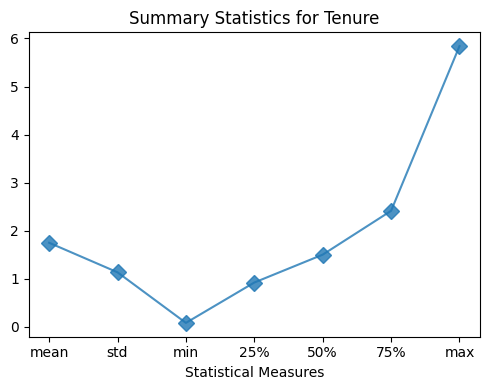

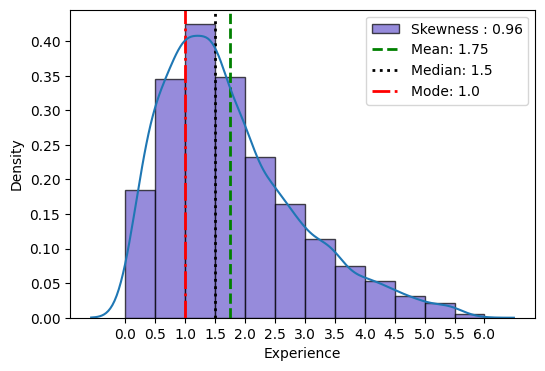

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


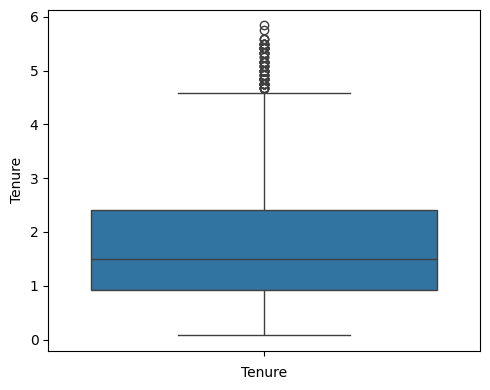

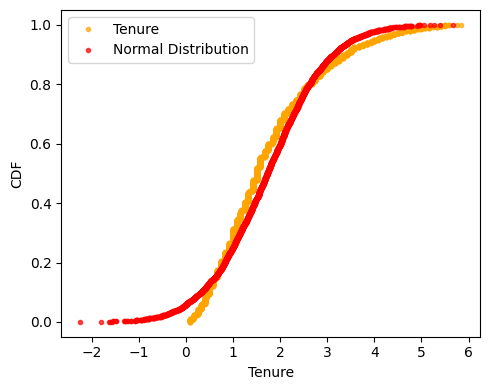

In [48]:
#Tenure

# Summary Plot

plt.figure(figsize=(5, 4))
amcat_data2['Tenure'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Tenure')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize = (6,4))
plt.hist(amcat_data2['Tenure'],
        ec = 'k',
        bins = np.arange(0, amcat_data2['Tenure'].max()+0.5, 0.5),
        color = 'slateblue',
        alpha = 0.7,
        label = f"Skewness : {round(amcat_data2['Tenure'].skew(),2)}",
        density = True)
plt.xticks(ticks = np.arange(0, amcat_data2['Tenure'].max()+0.5, 0.5))
plt.xlabel('Experience')
plt.ylabel('Density')
plt.axvline(amcat_data2['Tenure'].mean(), label = f"Mean: {round(amcat_data2['Tenure'].mean(),2)}",
            linestyle = '--',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['Tenure'].median(), label = f"Median: {round(amcat_data2['Tenure'].median(),2)}",
            linestyle = ':',
           color = 'k', linewidth = 2)
plt.axvline(amcat_data2['Tenure'].mode()[0], label = f"Mode: {round(amcat_data2['Tenure'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
sns.kdeplot(amcat_data2['Tenure'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5, 4))
sns.boxplot(amcat_data2['Tenure'])
plt.xlabel('Tenure')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5, 4))
x_tenure, y_tenure = CDF(amcat_data2['Tenure'])
x_sample_tenure, y_sample_tenure = CDF(np.random.normal(amcat_data2['Tenure'].mean(), amcat_data2['Tenure'].std(), size = len(amcat_data2['Tenure'])))
plt.plot(x_tenure, y_tenure, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_tenure, y_sample_tenure, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Tenure')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

###Key Findings from Tenure Data:

Experience Range: 4 years (minimum to maximum)

Distribution:

Skewed positive:

More respondents have lower experience ( tenure < 1.5 years).

Median tenure:

1.5 years
Mean & Median close: Suggesting a relatively symmetrical spread.
Outliers: A few individuals with much higher experience.

Normality:

Not normally distributed: Confirmed by CDF and skewed distribution.

Key Takeaways:

Most respondents have limited experience (less than 1.5 years).
While average experience is 1.5 years, a few individuals skew the data towards higher values.
Tenure in this dataset does not follow a normal distribution.

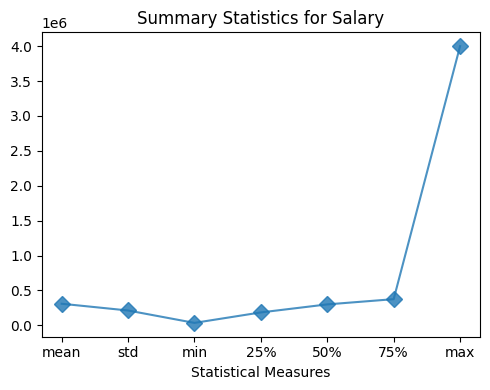

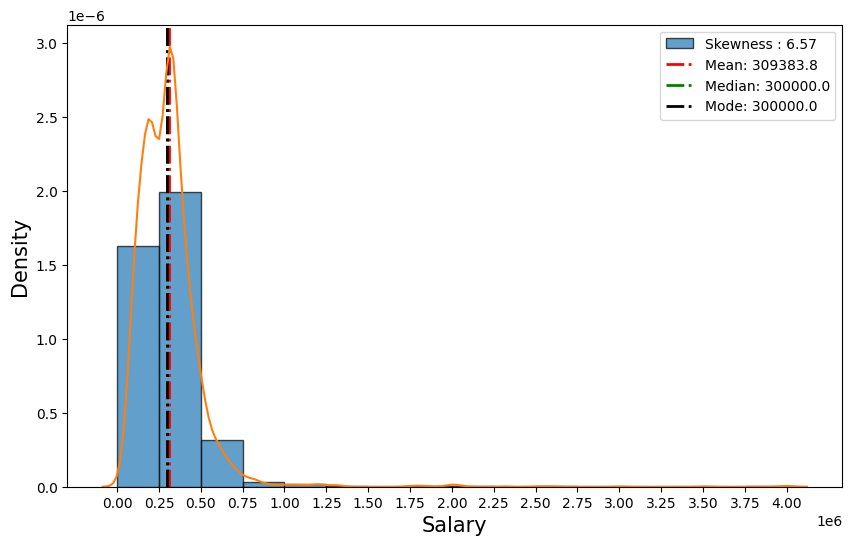

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


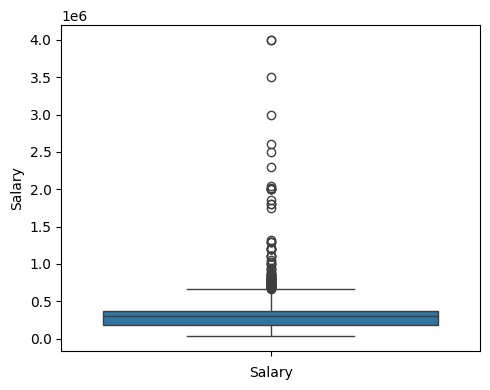

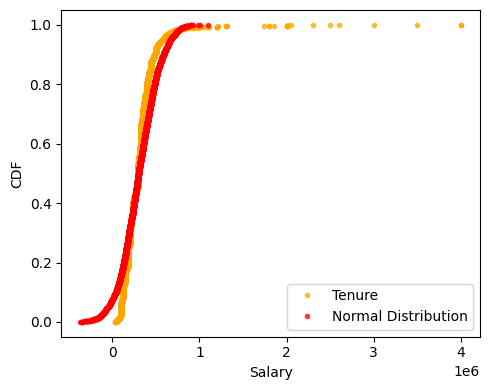

In [49]:
#Salary

# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['Salary'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Salary')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(0, amcat_data2['Salary'].max()+250000, 250000)
plt.figure(figsize = (10,6))
plt.hist(amcat_data2['Salary'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['Salary'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Salary', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['Salary'].mean(), label = f"Mean: {round(amcat_data2['Salary'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['Salary'].median(), label = f"Median: {round(amcat_data2['Salary'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['Salary'].mode()[0], label = f"Mode: {round(amcat_data2['Salary'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['Salary'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['Salary'])
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_salary, y_salary = CDF(amcat_data2['Salary'])
x_sample_salary, y_sample_salary = \
CDF(np.random.normal(amcat_data2['Salary'].mean(), amcat_data2['Salary'].std(), size = len(amcat_data2['Salary'])))
plt.plot(x_salary, y_salary, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_salary, y_sample_salary, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Salary')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

###Key Findings from Salary Data:
####Salary Variation:

Big differences in salaries exist across the dataset.

Distribution:

Salaries are skewed positively: many people earn less, while a few earn significantly more.
On average, everyone makes roughly the same (mean, median, and mode are close).
Skewness value of 6 indicates a strong departure from a normal distribution.

High Earners:

Box plot shows a concentration of people with high salaries.

Not Normal:

The CDF confirms the data is not normally distributed, deviating significantly from a typical bell-curve pattern.

Key Takeaways:

Most people earn within a certain range, but a few individuals earn much more.
Salaries are not evenly spread, with a higher concentration of lower earners.
This data does not follow a normal distribution, meaning standard statistical methods might need adjustments.

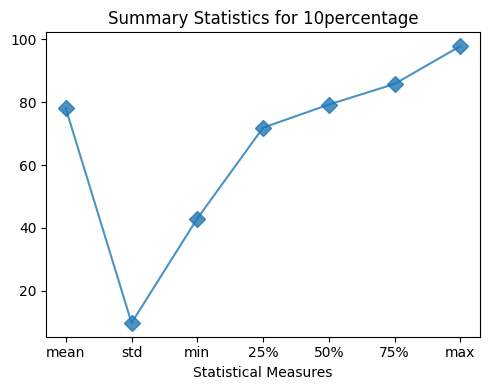

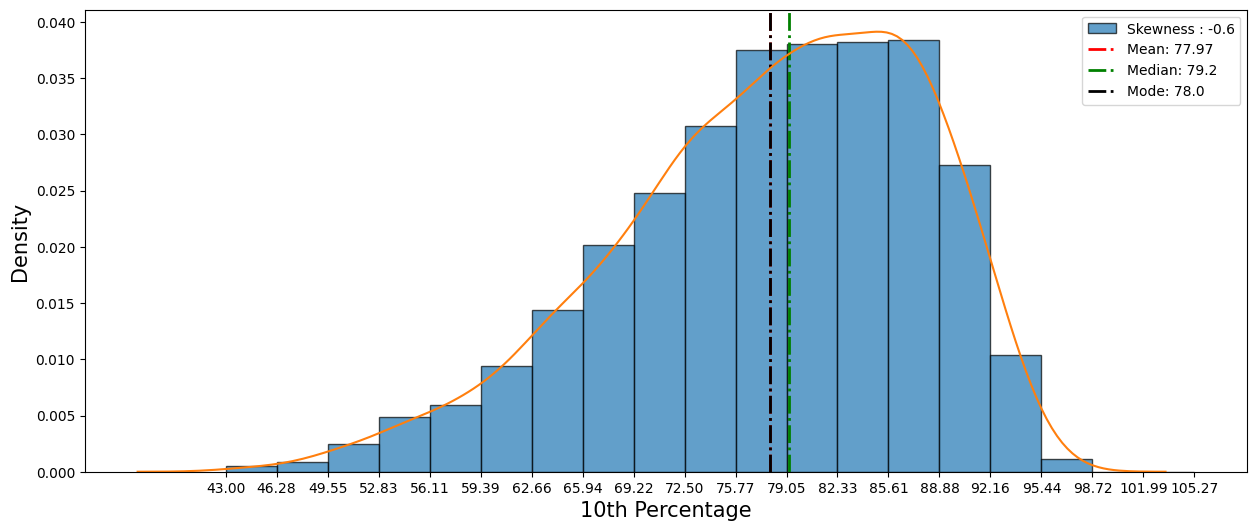

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


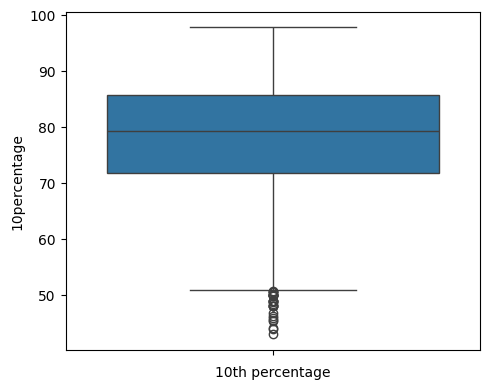

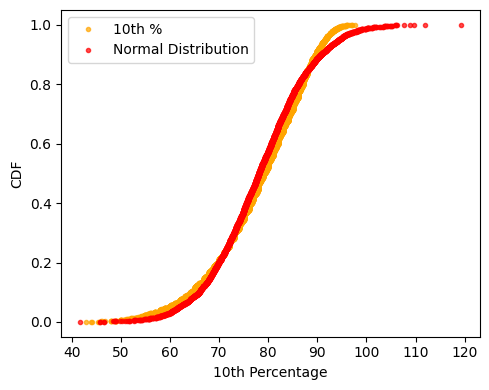

In [50]:
#10th Percentage

# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['10percentage'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 10percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

#Histogram


bins = np.arange(amcat_data2['10percentage'].min(), amcat_data2['10percentage'].max()+amcat_data2['10percentage'].std(),
                 amcat_data2['10percentage'].std()/3)
plt.figure(figsize = (15,6))
plt.hist(amcat_data2['10percentage'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['10percentage'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('10th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['10percentage'].mean(), label = f"Mean: {round(amcat_data2['10percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['10percentage'].median(), label = f"Median: {round(amcat_data2['10percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['10percentage'].mode()[0], label = f"Mode: {round(amcat_data2['10percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['10percentage'])
plt.legend()
plt.show()

#Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['10percentage'])
plt.xlabel('10th percentage')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_10, y_10 = CDF(amcat_data2['10percentage'])
x_sample_10 , y_sample_10 = \
CDF(np.random.normal(amcat_data2['10percentage'].mean(), amcat_data2['10percentage'].std(), size = len(amcat_data2['10percentage'])))
plt.plot(x_10, y_10, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = '10th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('10th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

###Key Findings from Score Data:
####Most Students Score Well:

Half of the students scored around 80% or lower.

Score Distribution:

Few students scored very low.
Most scores fall between 75% and 90%.
The most common score is 78%.
Average score is around 77%.

Outliers:

A few students scored significantly higher than the rest.

Not Normal Distribution:

The data is not evenly spread across all scores.
Scores don't follow a typical bell-curve pattern.

Key Takeaways:

While many students scored well, some outliers achieved much higher results.
The majority scored within a specific range, with most scores falling between 75% and 90%.
This data is not normally distributed, so standard statistical methods might need adjustments.

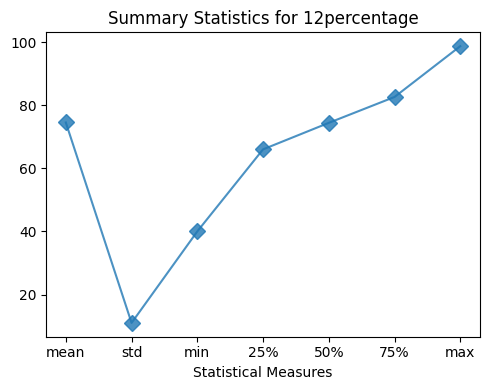

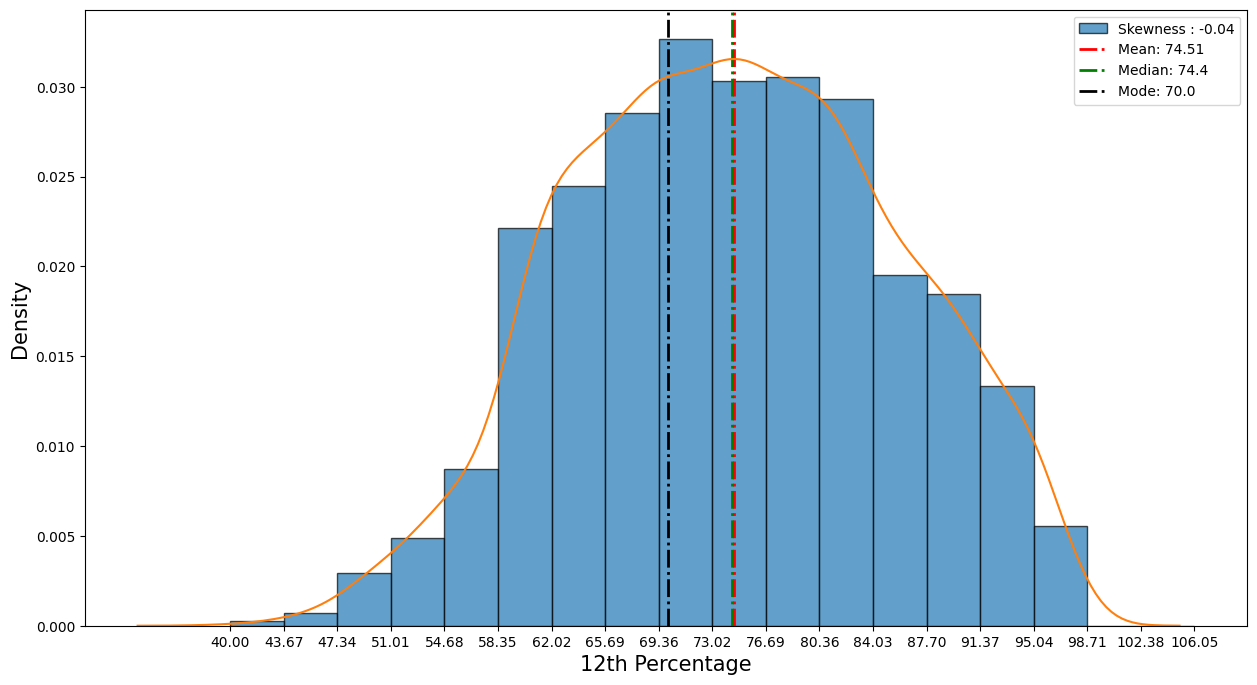

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


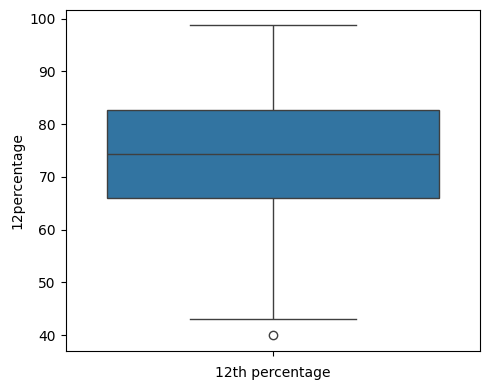

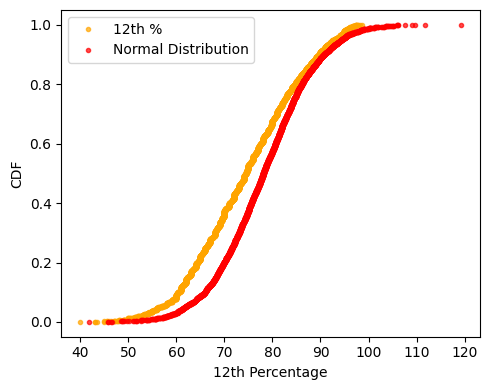

In [51]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['12percentage'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 12percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['12percentage'].min(), amcat_data2['12percentage'].max()+amcat_data2['12percentage'].std(),
                 amcat_data2['12percentage'].std()/3)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['12percentage'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['12percentage'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('12th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['12percentage'].mean(), label = f"Mean: {round(amcat_data2['12percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['12percentage'].median(), label = f"Median: {round(amcat_data2['12percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['12percentage'].mode()[0], label = f"Mode: {round(amcat_data2['12percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['12percentage'])
plt.legend()
plt.show()

#Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['12percentage'])
plt.xlabel('12th percentage')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_12, y_12 = CDF(amcat_data2['12percentage'])
x_sample_12 , y_sample_12 = \
CDF(np.random.normal(amcat_data2['12percentage'].mean(), amcat_data2['12percentage'].std(), size = len(amcat_data2['12percentage'])))
plt.plot(x_12, y_12, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = '12th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('12th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

###Score Distribution:

Most Students Score Well: About half of the students scored below 78%.
Concentration in Mid-Range: The majority (between 69% and 84%) scored within a specific range.

Average and Peak:

The average score is around 74%, with 70% being the most common score.

Few Low Scores:

Students with very low scores are scarce.

One Outlier:

Only one student has an extremely low score (visible in the box plot).

Non-Normal Distribution:

The data does not follow a typical bell-curve pattern (confirmed by the CDF).

1.5 CollegeGPA

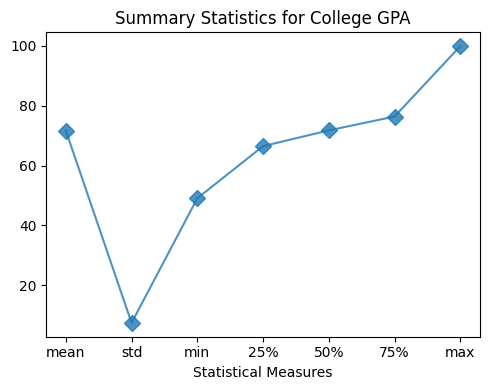

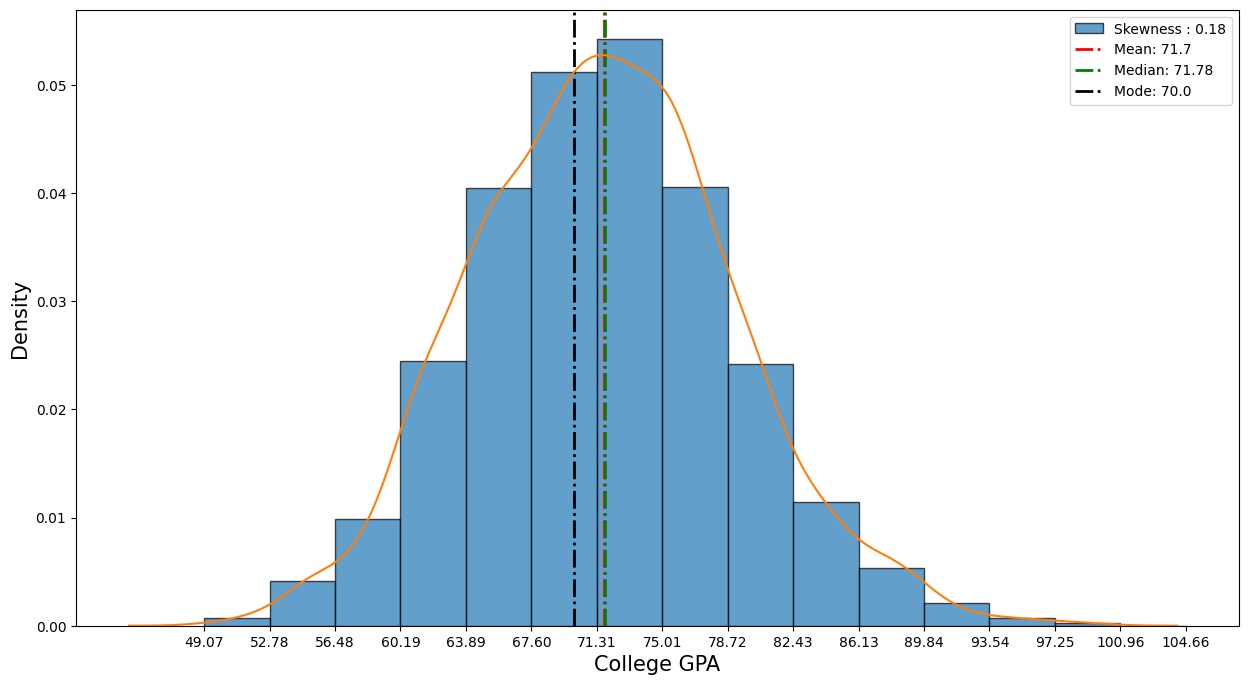

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


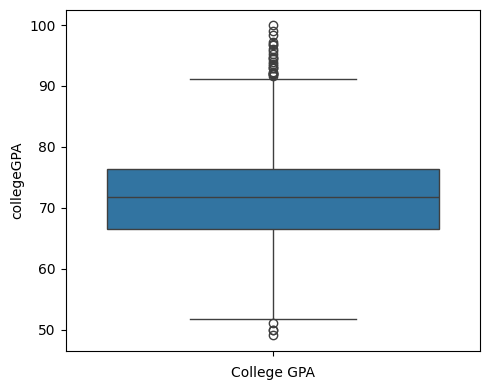

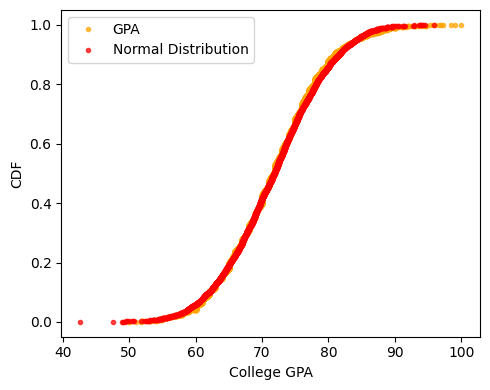

In [52]:
#Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['collegeGPA'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for College GPA')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['collegeGPA'].min(), amcat_data2['collegeGPA'].max()+amcat_data2['collegeGPA'].std(),
                 amcat_data2['collegeGPA'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['collegeGPA'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['collegeGPA'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('College GPA', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['collegeGPA'].mean(), label = f"Mean: {round(amcat_data2['collegeGPA'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['collegeGPA'].median(), label = f"Median: {round(amcat_data2['collegeGPA'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['collegeGPA'].mode()[0], label = f"Mode: {round(amcat_data2['collegeGPA'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['collegeGPA'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['collegeGPA'])
plt.xlabel('College GPA')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_gpa, y_gpa = CDF(amcat_data2['collegeGPA'])
x_sample_gpa , y_sample_gpa = \
CDF(np.random.normal(amcat_data2['collegeGPA'].mean(), amcat_data2['collegeGPA'].std(), size = len(amcat_data2['12percentage'])))
plt.plot(x_gpa, y_gpa, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'GPA')
plt.plot(x_sample_gpa, y_sample_gpa, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('College GPA')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

###Key Findings from GPA Data:

Most Students Score Well:

Around 75% of students scored 80% or lower on their GPA.

GPA Distribution:

Most GPAs fall within a specific range, between 63% and 78%.
The most common score was 70%.
The average GPA was around 74%.

Outliers:

A few students scored significantly higher or lower than the rest.
Normal Distribution:

The data appears to follow a normal distribution pattern (based on the CDF).

1.6 English

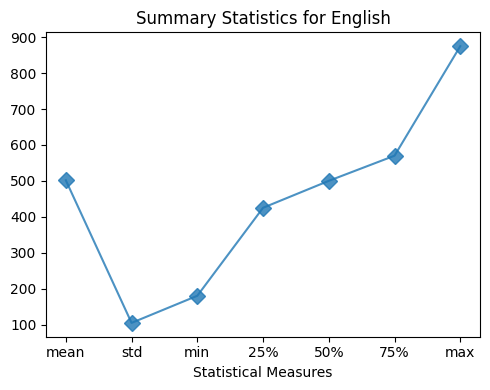

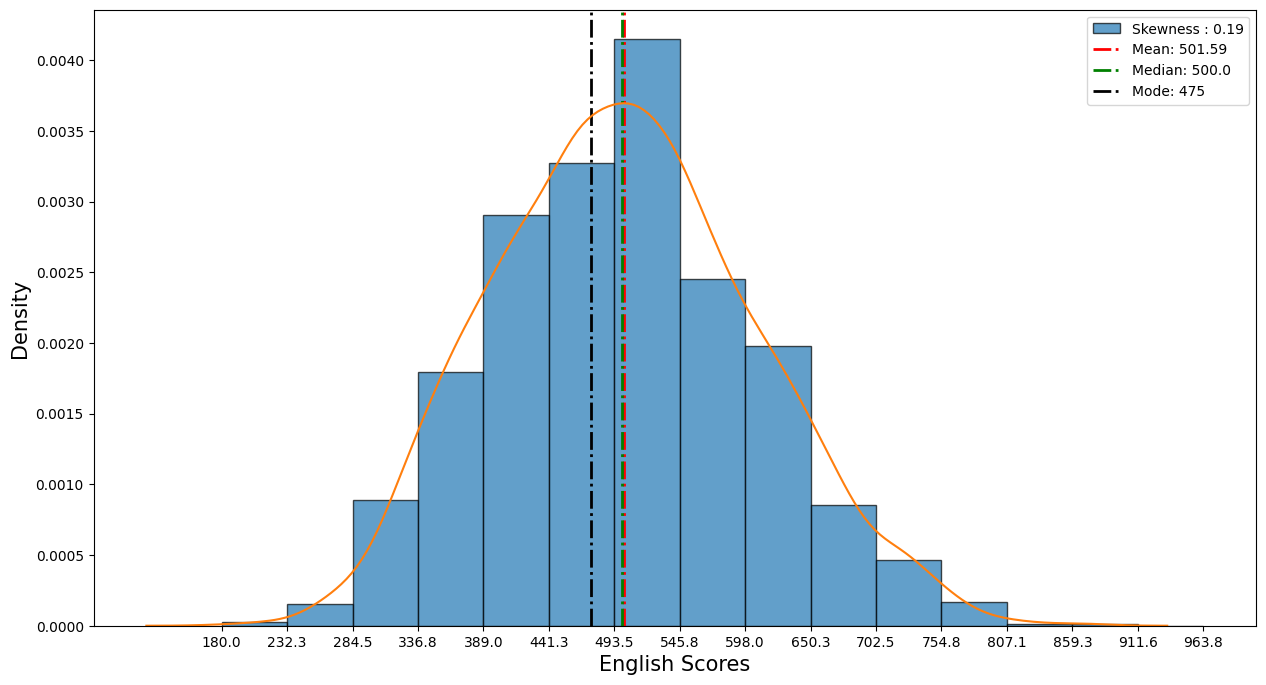

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


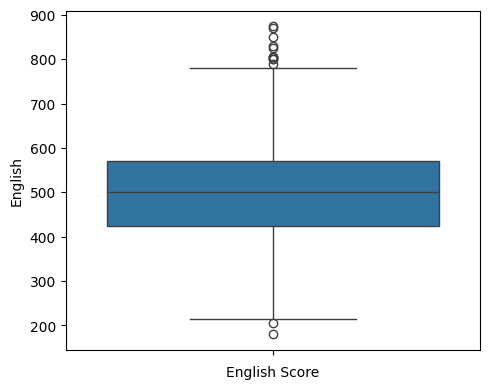

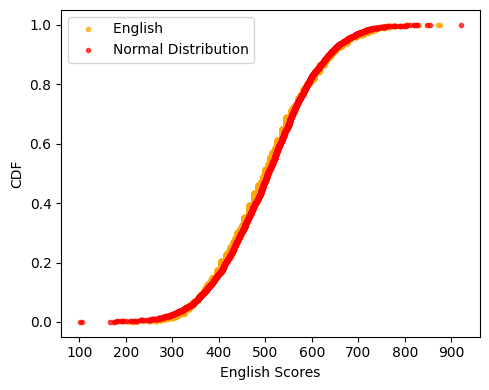

In [53]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['English'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for English')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['English'].min(), amcat_data2['English'].max()+amcat_data2['English'].std(),
                 amcat_data2['English'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['English'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['English'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('English Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['English'].mean(), label = f"Mean: {round(amcat_data2['English'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['English'].median(), label = f"Median: {round(amcat_data2['English'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['English'].mode()[0], label = f"Mode: {round(amcat_data2['English'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['English'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['English'])
plt.xlabel('English Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_eng, y_eng = CDF(amcat_data2['English'])
x_sample_eng , y_sample_eng = \
CDF(np.random.normal(amcat_data2['English'].mean(), amcat_data2['English'].std(), size = len(amcat_data2['English'])))
plt.plot(x_eng, y_eng, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'English ')
plt.plot(x_sample_eng, y_sample_eng, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('English Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

###Key Findings from English Exam Scores:

Many Scores Around Average:

About half of the students scored below 500 on the English exam.

Majority in Mid-Range:

Most scores were between 389 and 545, with a peak at 475.

Average Performance:

The average score was 502.

Outliers Present:

Both very low and very high scores were present, as shown by the box plot.

Normal Distribution:

The CDF suggests the data follows a normal distribution pattern.

1.7 Logical

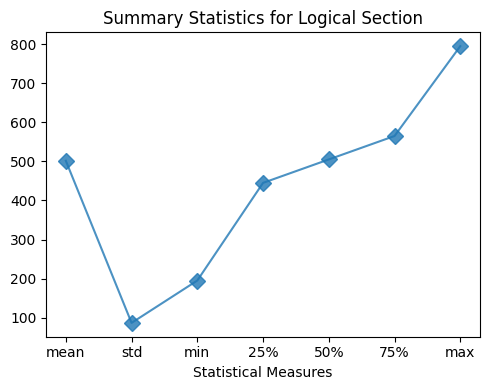

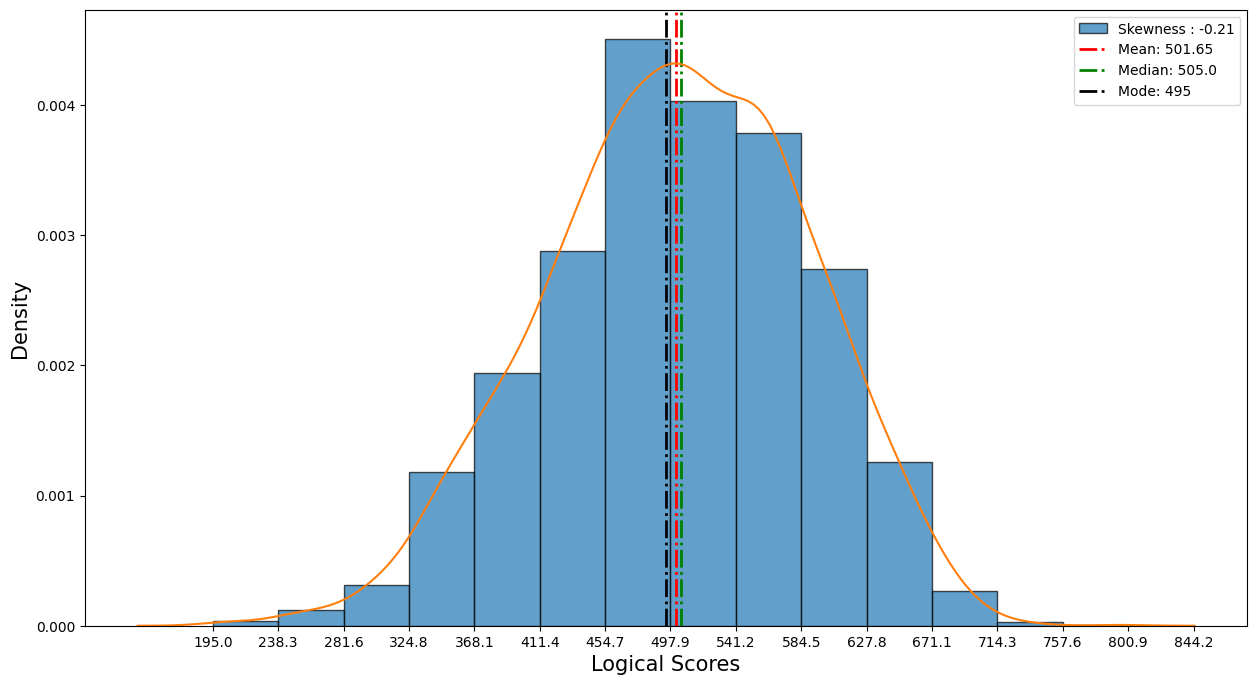

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


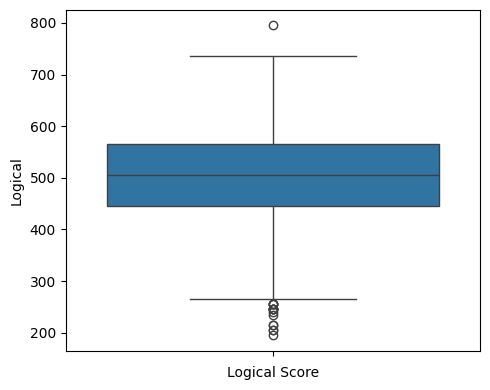

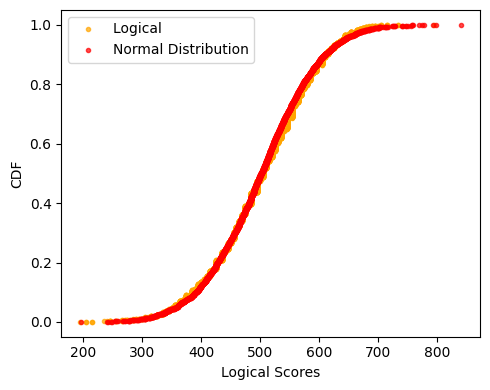

In [54]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['Logical'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Logical Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['Logical'].min(), amcat_data2['Logical'].max()+amcat_data2['Logical'].std(),
                 amcat_data2['Logical'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['Logical'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['Logical'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Logical Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['Logical'].mean(), label = f"Mean: {round(amcat_data2['Logical'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['Logical'].median(), label = f"Median: {round(amcat_data2['Logical'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['Logical'].mode()[0], label = f"Mode: {round(amcat_data2['Logical'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['Logical'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['Logical'])
plt.xlabel('Logical Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_log, y_log = CDF(amcat_data2['Logical'])
x_sample_log , y_sample_log = \
CDF(np.random.normal(amcat_data2['Logical'].mean(), amcat_data2['Logical'].std(), size = len(amcat_data2['Logical'])))
plt.plot(x_log, y_log, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Logical ')
plt.plot(x_sample_log, y_sample_log, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Logical Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

###Key Findings from Logical Exam Scores:

Half Score Below Average:

Around half of the students scored below 500 on the logical exam.

Majority in Mid-Range:

Most scores were between 454 and 584, with a peak at 495.

Average Performance:

The average score was 502.

Few High Scores, More Low Scores:

The box plot shows mainly lower outliers, with only one high outlier.

Normal Distribution:

The CDF suggests the data follows a normal distribution pattern.

1.8 Quant

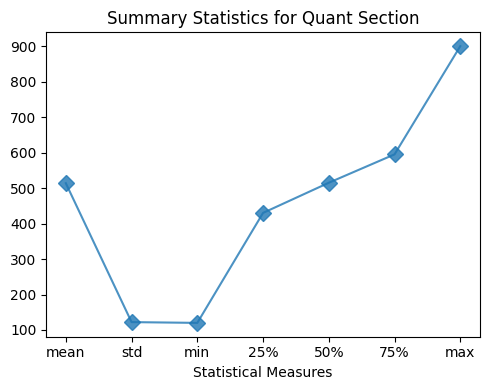

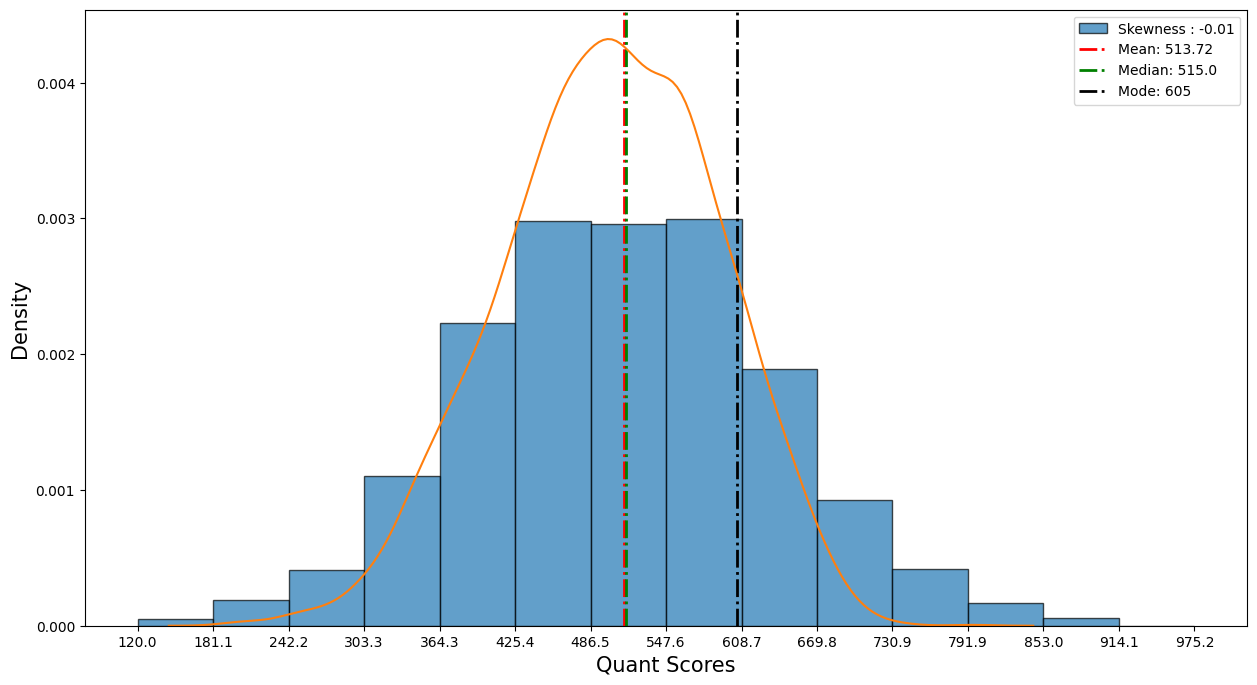

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


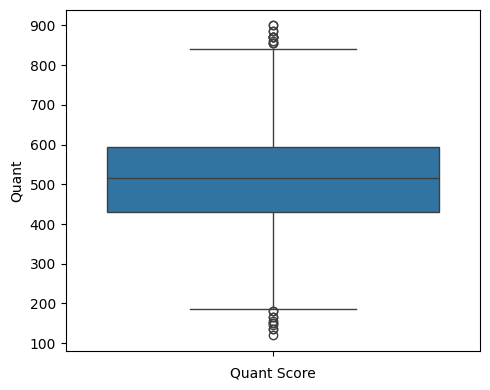

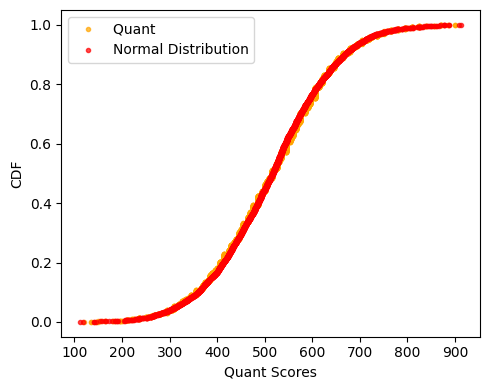

In [55]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['Quant'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Quant Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['Quant'].min(), amcat_data2['Quant'].max()+amcat_data2['Quant'].std(),
                 amcat_data2['Quant'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['Quant'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['Quant'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Quant Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['Quant'].mean(), label = f"Mean: {round(amcat_data2['Quant'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['Quant'].median(), label = f"Median: {round(amcat_data2['Quant'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['Quant'].mode()[0], label = f"Mode: {round(amcat_data2['Quant'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['Logical'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['Quant'])
plt.xlabel('Quant Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_q, y_q = CDF(amcat_data2['Quant'])
x_sample_q , y_sample_q = \
CDF(np.random.normal(amcat_data2['Quant'].mean(), amcat_data2['Quant'].std(), size = len(amcat_data2['Quant'])))
plt.plot(x_q, y_q, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Quant ')
plt.plot(x_sample_q, y_sample_q, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Quant Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

###Key Findings from Logical Exam Scores:

Many Scores Around Average:

Three quarters of students scored below 600 on the logical exam.

Majority in Mid-Range:

Most scores fell between 425 and 608, with the most common score being 605.

Average Performance:

The average score was 513.

Outliers Present:

Both very low and very high scores were present, as shown by the box plot.

Normal Distribution:

The CDF suggests the data follows a normal distribution pattern.

###2) Categorical Features

Designation

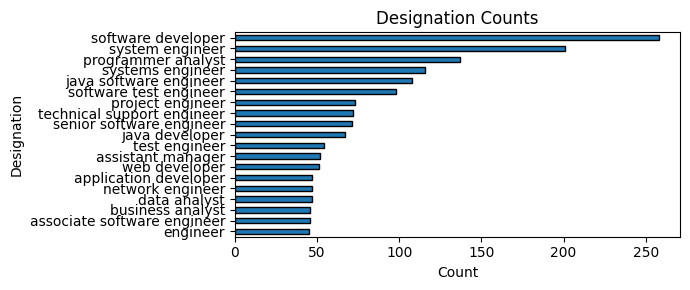

In [102]:
amcat_data2['Designation'].value_counts()[1:20].sort_values(
    ascending=True).plot(
    kind='barh',
    title='Designation Counts',
    figsize=(7, 3),
    ec='k'
)
plt.ylabel('Designation')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

###Observation:

Most Popular Job Titles:

Software Engineer: This is the most common designation, followed by...

System Engineer: Second most frequent title.

Software Developer: Third most common job title.

Note: This only shows the top three and excludes the "Other" category.

This rewrite is simpler and more concise, while still conveying the key information. I hope it's helpful!

JobCity

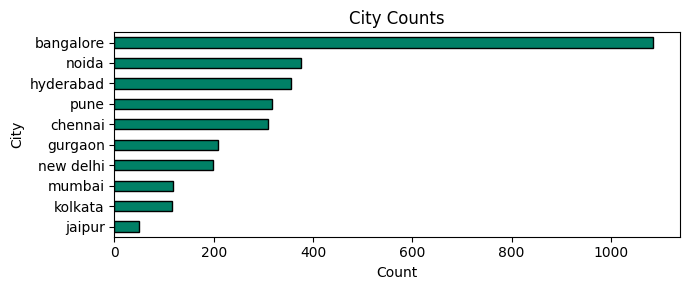

In [101]:
amcat_data2['JobCity'].value_counts()[:10].sort_values(ascending=True).plot(
    kind='barh',
    cmap='summer',
    title='City Counts',
    figsize=(7,3),
    ec='k'
)
plt.ylabel('City')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

###Observation:

Top Cities for Job Placements:

Bangalore: The top city for grabbing jobs, followed by...

Noida, Hyderabad, Pune: These three cities offer good job opportunities.

Mumbai, Kolkata: Fewer job placements compared to the others.

###Gender

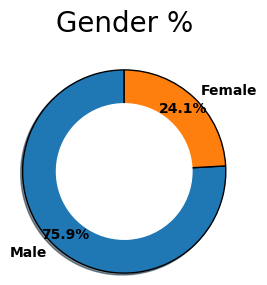

In [58]:
plt.figure(figsize=(3,3))
plt.pie(amcat_data2['Gender'].value_counts().tolist(),
        labels=amcat_data2['Gender'].value_counts().index,
        autopct='%1.1f%%',
        radius=1.5,
        wedgeprops={'edgecolor': 'k'},
        textprops={'fontsize': 10, 'fontweight': 'bold'},
        shadow=True,
        startangle=90,
        pctdistance=0.85)
plt.pie(amcat_data2['Gender'].value_counts().tolist(),
        colors=['white'],
        wedgeprops={'edgecolor': 'white'},
        radius=1)
plt.title('Gender %', pad=40, size=20)
plt.tight_layout()
plt.show()

###Observation:

Unequal Gender Distribution:

The data shows a significant difference in the number of males and females, with males being much more prevalent. This imbalance could impact the analysis of the dataset, so it's important to consider this when interpreting the results.

####10board and 12board

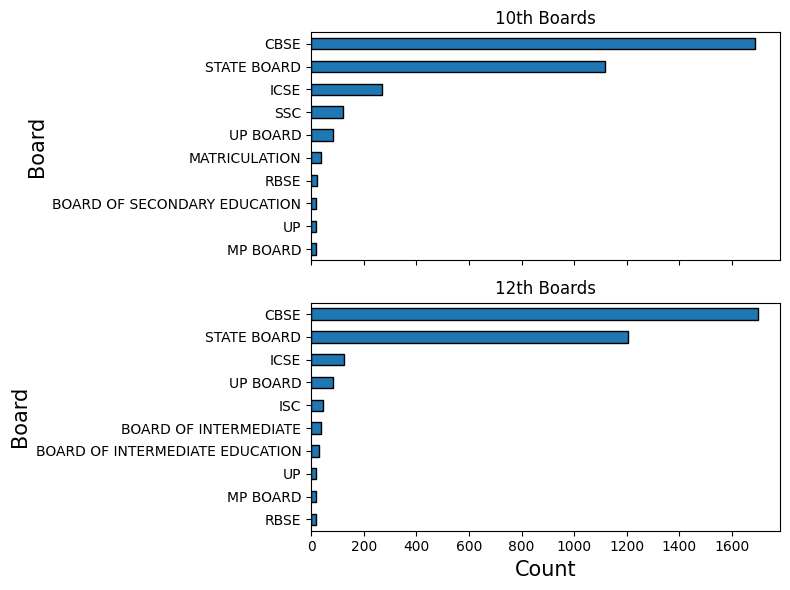

In [103]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

amcat_data2['10board'].str.upper().value_counts()[:10].sort_values(ascending=True).plot(
    kind='barh',
    ax=ax[0],
    ec='k',
    title='10th Boards'
)
ax[0].set_ylabel('Board', size=15)

amcat_data2['12board'].str.upper().value_counts()[:10].sort_values(ascending=True).plot(
    kind='barh',
    ax=ax[1],
    ec='k',
    title='12th Boards'
)
ax[1].set_ylabel('Board', size=15)
ax[1].set_xlabel('Count', size=15)

plt.tight_layout()
plt.show()

###Most Students Graduated from CBSE Board:

12th Grade: The majority of students completed their 12th grade under the CBSE board.

10th Grade: Similarly, the most common board for 10th grade was also CBSE.

###College Tier

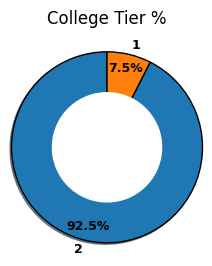

In [60]:
plt.figure(figsize=(3,3))
plt.pie(amcat_data2['CollegeTier'].value_counts().tolist(), labels = amcat_data2['CollegeTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.75,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':9,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.85)
plt.pie(amcat_data2['CollegeTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 40, size = 12)
plt.margins(0.02)
plt.tight_layout()
plt.show()

###Overwhelmingly Tier 1 Colleges:

92.5% of colleges: This data reflects a significant concentration within Tier 1 institutions.

Degree

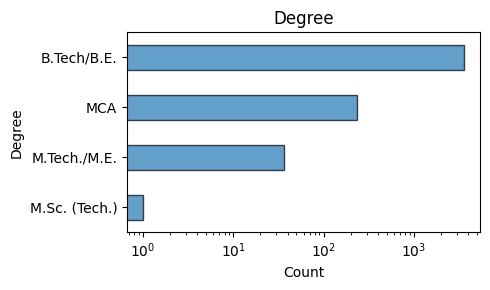

In [61]:
amcat_data2['Degree'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    title='Degree',
    figsize=(5, 3),
    ec='k',
    alpha=0.7
)
plt.ylabel('Degree')
plt.xlabel('Count')
plt.xscale('log')
plt.tight_layout()
plt.show()

###B.Tech Dominates:

B.Tech: The vast majority of students hold this degree, with significantly fewer completing M.Sc(Tech).

###CollegeCityTier

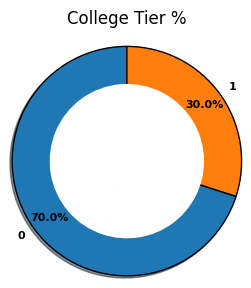

In [62]:
plt.figure(figsize=(3,3))
plt.pie(amcat_data2['CollegeCityTier'].value_counts().tolist(), labels = amcat_data2['CollegeCityTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':8,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.84)
plt.pie(amcat_data2['CollegeCityTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 30, size = 12)
plt.margins(0.02)
plt.tight_layout()
plt.show()

###Observation

The data shows a concentration of colleges in Tier 0 cities. (Slightly more informative, but uses "concentration" which might not be universally understood)

###GraduationYear

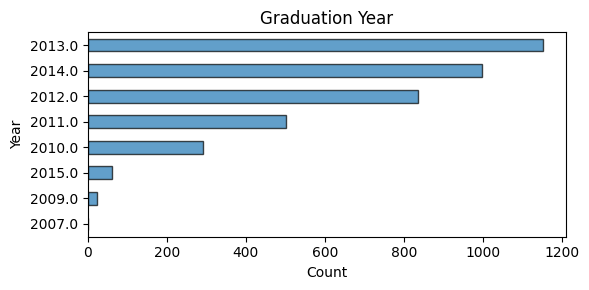

In [63]:
amcat_data2['GraduationYear'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    title='Graduation Year',
    figsize=(6, 3),
    ec='k',
    alpha=0.7
)
plt.ylabel('Year')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

Observations

Maximum number of students were graduated in 2013, followed by the year 2014 and 2012.



###Removing Outliers

In [64]:
def treat_outliers(column):
  sorted(column)
  q1, q3 = np.percentile(column, [25, 75])
  iqr = q3 - q1
  lower_range = q1 - (1.5 * iqr)
  upper_range = q3 + (1.5 * iqr)
  return (lower_range , upper_range)

In [65]:
amcat_data2.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age', 'Tenure'],
      dtype='object')

In [66]:
numerical_columns = ['Salary','10percentage','12percentage','English', 'Logical','Quant','Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Age', 'Tenure']

amcat_data3 = amcat_data2.copy(deep=True)

In [67]:
for column in numerical_columns:
  lower_bound, upper_bound = treat_outliers(amcat_data3[column])

  amcat_data3 = amcat_data3.drop(amcat_data3[(amcat_data3[column] < lower_bound) | (amcat_data3[column] > upper_bound)].index)

In [68]:
print(f'No. of rows with outliers: {amcat_data2.shape[0]}')
print(f'No. of rows without outliers: {amcat_data3.shape[0]}')

No. of rows with outliers: 3864
No. of rows without outliers: 2490


##Performing BI-Variate Analysis

###Barplots

####Average Salary for each Designation

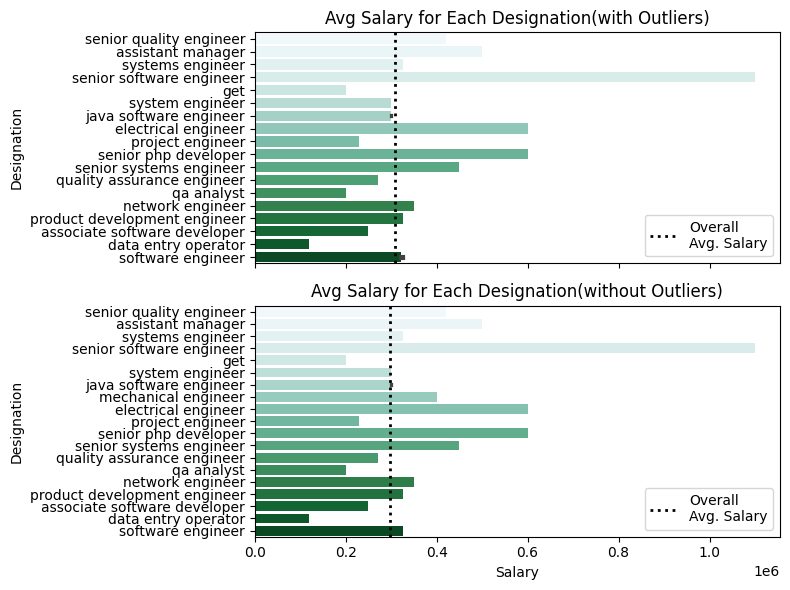

In [109]:
fig, ax = plt.subplots(2, 1, figsize = (8,6), sharex = True)
a = amcat_data2.head(20)
sns.barplot(x = 'Salary', y = 'Designation',
           data = a,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(amcat_data2['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary for Each Designation(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')

b = amcat_data.head(20)
sns.barplot(x = 'Salary', y = 'Designation',
           data = b,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(amcat_data3['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('Avg Salary for Each Designation(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')

plt.tight_layout()
plt.show()

###Observations:

Highest Earners:

Senior Software Engineer: They top the salary charts, but also have the most variable salaries (high standard deviation).

Below Average:

Software Developer and Technical Support Engineer: These are the only two positions with salaries below the average.


###Average Salary for every Gender

<ipython-input-70-695839f4b6f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Salary', y = 'Gender',
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-70-695839f4b6f6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

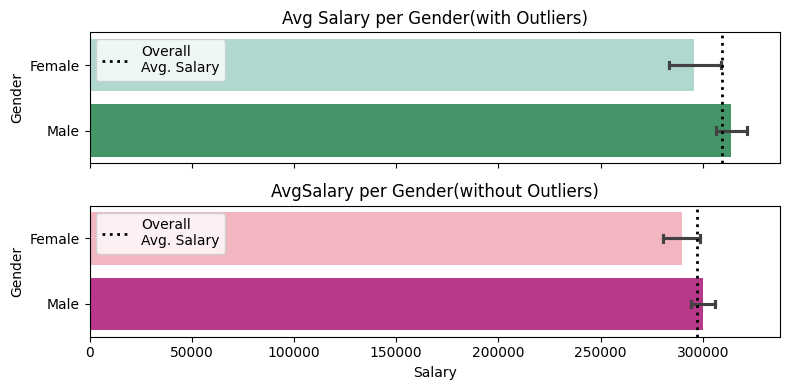

In [70]:
fig, ax = plt.subplots(2, 1, figsize = (8,4), sharex = True)
sns.barplot(x = 'Salary', y = 'Gender',
           data = amcat_data2,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(amcat_data2['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary per Gender(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'Salary', y = 'Gender',
           data = amcat_data3,
           palette = 'RdPu',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(amcat_data3['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('AvgSalary per Gender(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')


plt.tight_layout()
plt.show()

###Observations:

Average Salaries by Gender:

Similar Overall Averages: The data shows similar average salaries for men and women, suggesting no immediate gender bias in this regard.

###Scatter Plots

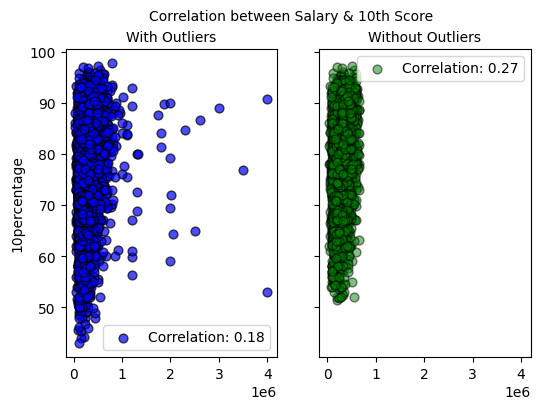

In [112]:
# Salary & 10th Score

fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(amcat_data2['Salary'],amcat_data2['10percentage'],
               ec = 'k',
               color = 'blue',
               alpha = 0.7,
               s = 40,
               label = f"Correlation: {round(amcat_data2[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('10percentage')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(amcat_data3['Salary'],amcat_data3['10percentage'],
               ec = 'k',
               color = 'green',
               alpha = 0.5,
               s = 40,
               label = f"Correlation: {round(amcat_data3[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()


fig.suptitle('Correlation between Salary & 10th Score', size = 10)
plt.show()

###Observations:

The data shows no link between performance in 10th grade and future salary.

###Salary & 12th score

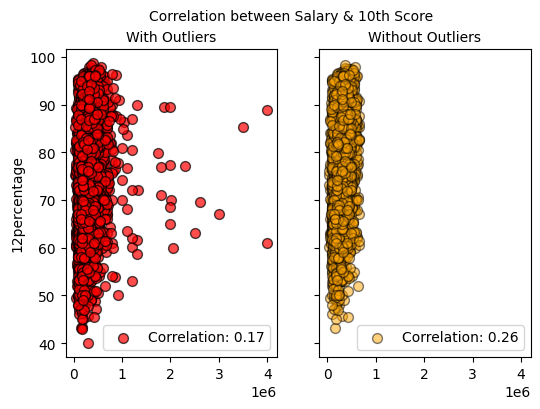

In [113]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(amcat_data2['Salary'],amcat_data2['12percentage'],
               ec = 'k',
               color = 'red',
               alpha = 0.7,
               s = 50,
               label = f"Correlation: {round(amcat_data2[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('12percentage')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(amcat_data3['Salary'],amcat_data3['12percentage'],
               ec = 'k',
               color = 'orange',
               alpha = 0.5,
               s = 50,
               label = f"Correlation: {round(amcat_data3[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()

fig.suptitle('Correlation between Salary & 10th Score', size = 10)
plt.show()

###Observation

Getting good grades in 10th grade doesn't guarantee a higher salary later on.

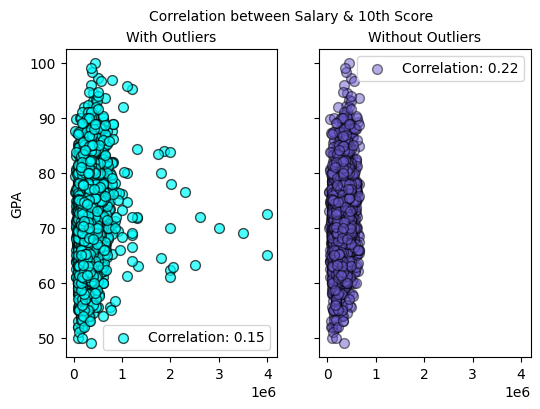

In [114]:
#Salary and CollegeGPA score

fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(amcat_data2['Salary'],amcat_data2['collegeGPA'],
               ec = 'k',
               color = 'cyan',
               alpha = 0.7,
               s = 50,
               label = f"Correlation: {round(amcat_data2[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('GPA')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(amcat_data3['Salary'],amcat_data3['collegeGPA'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               s = 50,
               label = f"Correlation: {round(amcat_data3[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()

fig.suptitle('Correlation between Salary & 10th Score', size = 10)
plt.show()

###Observation:

Doing well in 10th grade doesn't guarantee a higher salary later in life.

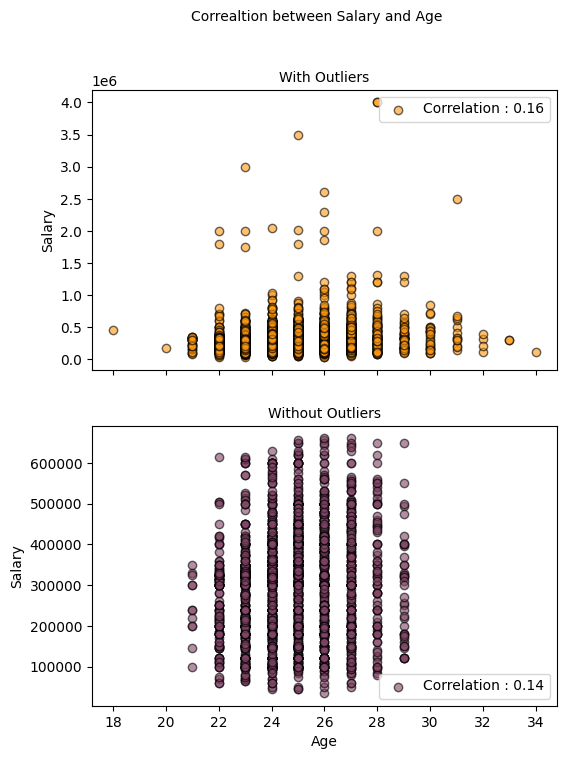

In [115]:
#Salary and Age

fig, ax = plt.subplots(2, 1, figsize = (6,8), sharex  = True)
ax[0].scatter(amcat_data2['Age'], amcat_data2['Salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(amcat_data2[['Age','Salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers' , size=10)


ax[1].scatter(amcat_data3['Age'], amcat_data3['Salary'],
             ec = 'k',
             color = '#834567',
             alpha = 0.6,
             label = f"Correlation : {round(amcat_data3[['Age','Salary']].corr().iloc[1,0],2)}"
             )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers' , size=10)
ax[1].set_xlabel('Age')

fig.suptitle('Correaltion between Salary and Age', size = 10)

plt.show()

###Observations:

Looking at the typical data, there's no clear link between salary and age.

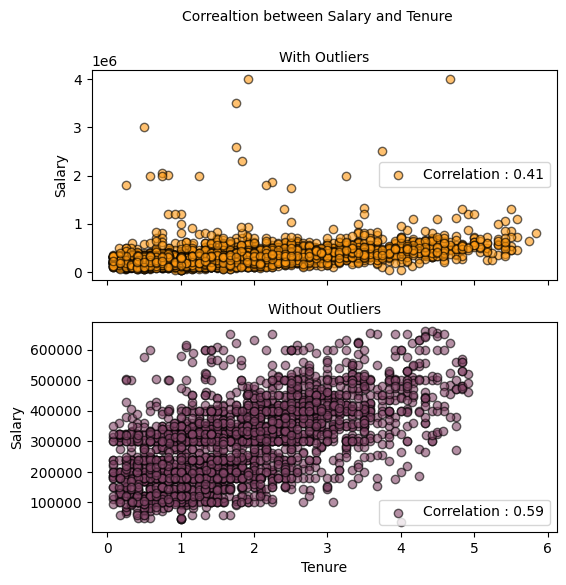

In [116]:
#Salary and Tenure

fig, ax = plt.subplots(2, 1, figsize = (6,6), sharex  = True)
ax[0].scatter(amcat_data2['Tenure'], amcat_data2['Salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(amcat_data2[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers' , size=10)


ax[1].scatter(amcat_data3['Tenure'], amcat_data3['Salary'],
             ec = 'k',
             color = '#834567',
             alpha = 0.6,
             label = f"Correlation : {round(amcat_data3[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers' , size=10)
ax[1].set_xlabel('Tenure')

fig.suptitle('Correaltion between Salary and Tenure', size = 10)

plt.show()

###Observations:

Tenure and Salary Increase:

After removing unusual data points, the analysis shows a positive link between tenure (time spent in the company) and salary. With each year of experience, salaries generally increase by around 50%.

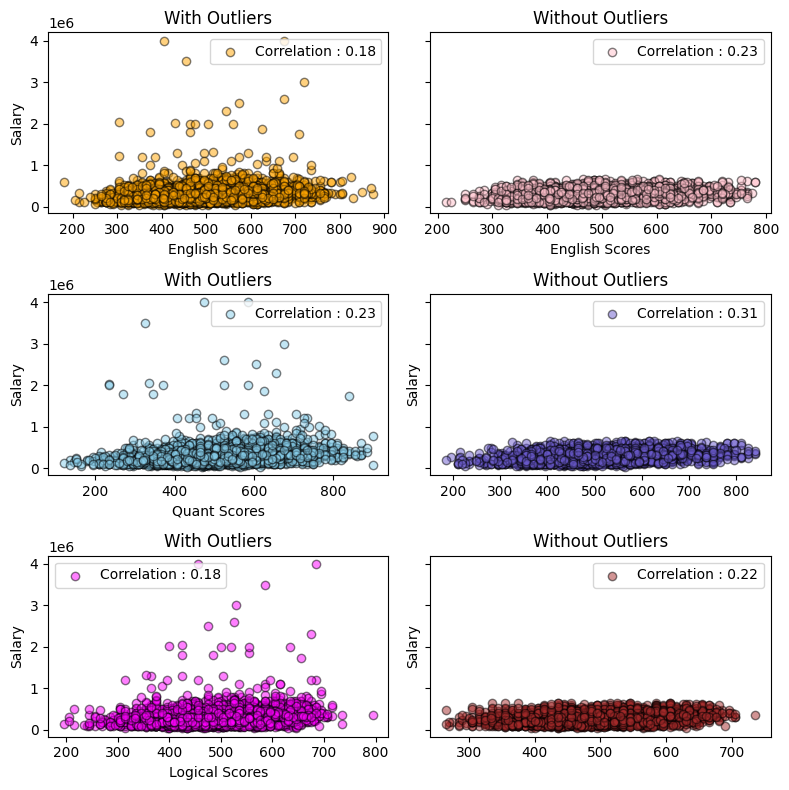

In [76]:
#Salary with including English, Quants, Logical

fig, ax = plt.subplots(3, 2, figsize = (8,8), sharey = True)
ax[0,0].scatter(amcat_data2['English'],amcat_data2['Salary'],
               ec = 'k',
               color = 'orange',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data2[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('Salary')
ax[0,0].set_xlabel('English Scores')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(amcat_data3['English'],amcat_data3['Salary'],
               ec = 'k',
               color = 'pink',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data3[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].set_xlabel('English Scores')
ax[0,1].legend()




ax[1,0].scatter(amcat_data2['Quant'],amcat_data2['Salary'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data2[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('Salary')
ax[1,0].set_xlabel('Quant Scores')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(amcat_data3['Quant'],amcat_data3['Salary'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data3[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_ylabel('Salary')
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()



ax[2,0].scatter(amcat_data2['Logical'],amcat_data2['Salary'],
               ec = 'k',
               color = 'magenta',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data2[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('Salary')
ax[2,0].set_xlabel('Logical Scores')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(amcat_data3['Logical'],amcat_data3['Salary'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data3[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_ylabel('Salary')
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()


plt.tight_layout()
plt.show()

###Observation:

The scatter plots suggest that the scores don't have a direct impact on salary.

###Crosstabs

10


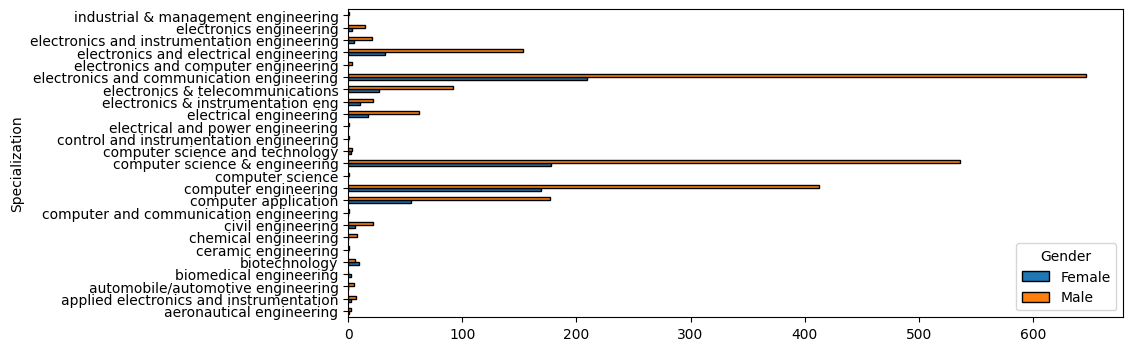

In [121]:
#Gender and Specialization
pd.crosstab(amcat_data2['Gender'],amcat_data2['Specialization']).T.head(25).plot(kind = 'barh', ec = 'k', figsize = (10,4))
print(10)

###Observations:

While men and women are somewhat evenly distributed across specializations, there's a noticeable difference. Men are almost twice as numerous, and this gap widens in mechanical and electronics, where female participation is minimal.

###Pivot Tables

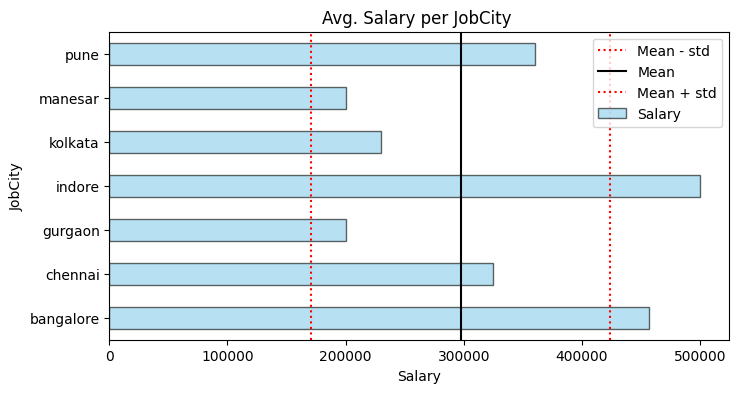

In [127]:
#Average Salary per JobCity

pd.pivot_table(index = 'JobCity',
              values = 'Salary',
              data = amcat_data3.head(10)).plot(kind = 'barh',
                             ec = 'k',
                            alpha = 0.6,
                                  color = 'skyblue',
                                  title = 'Avg. Salary per JobCity ',
                                  figsize = (8,4))
plt.xlabel('Salary')
plt.axvline(amcat_data3['Salary'].mean() - amcat_data3['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(amcat_data3['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(amcat_data3['Salary'].mean() + amcat_data3['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

<ipython-input-79-b96e5f2eefce>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(index = 'CollegeTier',


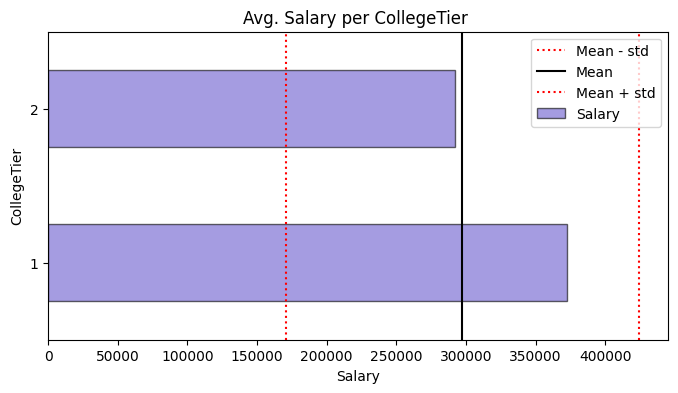

In [79]:
#Average Salary per CollegeTier

pd.pivot_table(index = 'CollegeTier',
              values = 'Salary',
              data = amcat_data3).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'slateblue',
                                  title = 'Avg. Salary per CollegeTier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(amcat_data3['Salary'].mean() - amcat_data3['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(amcat_data3['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(amcat_data3['Salary'].mean() + amcat_data3['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

###Observations:

Tier 1 Colleges Lead in Salary:

Colleges from Tier 1 cities: Graduates tend to earn higher salaries compared to those from Tier 2 cities.
Tier 2 Colleges: Salaries offered are generally below the overall average.

<ipython-input-80-4847b31105e5>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(index = 'CollegeCityTier',


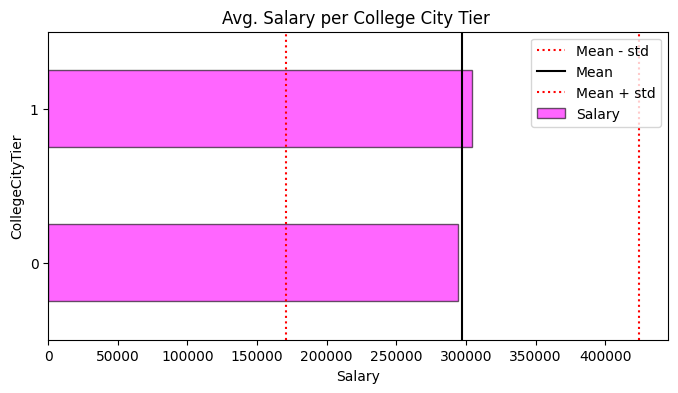

In [80]:
#Average Salary per CollegeCityTier

pd.pivot_table(index = 'CollegeCityTier',
              values = 'Salary',
              data = amcat_data3).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'magenta',
                                  title = 'Avg. Salary per College City Tier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(amcat_data3['Salary'].mean() - amcat_data3['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(amcat_data3['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(amcat_data3['Salary'].mean() + amcat_data3['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

###Observations:

When it comes to salary, there's little difference between Tier 1 and Tier 2 cities for students.

###Research Questions:

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”

In [81]:
designations = amcat_data['Designation'].value_counts().sort_index()
pd.set_option('display.max_rows', None)

print(designations)

Designation
.net developer                             34
.net web developer                          4
account executive                           4
account manager                             1
admin assistant                             2
administrative coordinator                  1
administrative support                      1
aircraft technician                         1
android developer                          46
application developer                      52
application engineer                       22
apprentice                                  3
ase                                         3
asp.net developer                          26
assistant administrator                     1
assistant electrical engineer               2
assistant engineer                          4
assistant manager                          52
assistant professor                        12
assistant programmer                        3
assistant software engineer                 3
assistant store manage

In [82]:
amcat_data['Designation'] = amcat_data['Designation'].replace([
    'programmer analyst trainee', 'programmer analyst'
], 'programmer analyst'
)

amcat_data['Designation'] = amcat_data['Designation'].replace([
    'software eng', 'software engg', 'software engineer', 'software engineere', 'software enginner'
], 'software engineer'
)

In [83]:
amcat_data4 = amcat_data[(amcat_data["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
                (amcat_data["Specialization"].isin(["computer science & engineering", "computer engineering"]))]


<ipython-input-84-cf42ccd0b0c3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


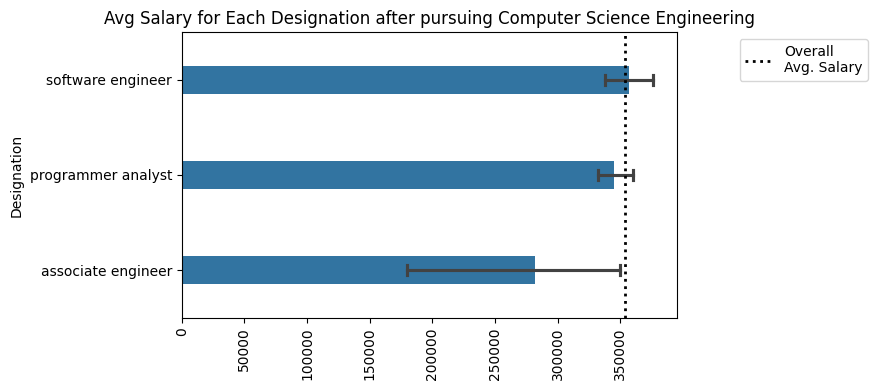

In [84]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Salary', y='Designation',
            data=amcat_data4,
            capsize=0.1,
            width=0.3,
            ax=ax)
ax.axvline(amcat_data4['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
ax.set_title('Avg Salary for Each Designation after pursuing Computer Science Engineering')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


####Answer with considering all designations once in the Hypothesis

In [85]:
import random

no = 30

salary_random = random.sample(amcat_data4['Salary'].tolist(),no)
print(salary_random)

[500000.0, 305000.0, 350000.0, 300000.0, 250000.0, 350000.0, 315000.0, 345000.0, 400000.0, 500000.0, 400000.0, 180000.0, 880000.0, 110000.0, 360000.0, 500000.0, 200000.0, 335000.0, 925000.0, 380000.0, 515000.0, 340000.0, 475000.0, 400000.0, 300000.0, 335000.0, 330000.0, 615000.0, 110000.0, 300000.0]


In [86]:
#Creating a Function for T-Score

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

In [87]:
#Computing the Sample Values

from scipy.stats import t,norm
import statistics

print('Sample Mean: ', statistics.mean(salary_random))
print('Sample Standard Deviation: ', statistics.stdev(salary_random))

Sample Mean:  386833.3333333333
Sample Standard Deviation:  180824.18272308397


In [88]:
sample_size = 40
sample_mean = statistics.mean(salary_random)
pop_mean = 275000
sample_std = statistics.stdev(salary_random)

In [89]:
#Calculating t_value

t_value = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_value)

3.911512789235099


In [90]:
#Calculating t_critical

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha/2, df = 99)

print(t_critical)

1.9842169515086827


Performing 1-sample T-test visualization

Text(386833.3333333333, 0.7, 'x_bar')

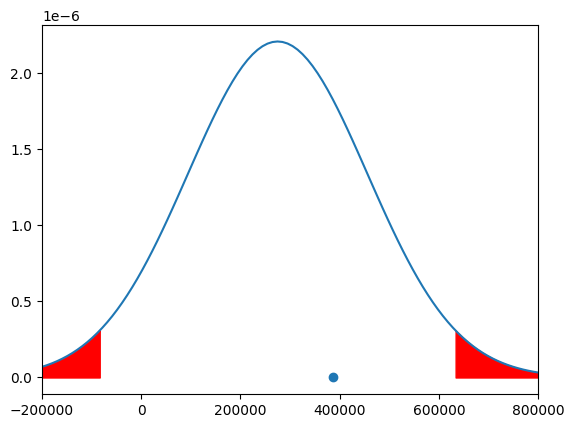

In [91]:
x_min = -200000
x_max = 800000

mean = pop_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.7))

In [92]:
if(t_value < t_critical):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is sufficent evidence to reject the Null Hypothesis


In [93]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_value)))

print("p_value = ", p_value)

if(p_value > alpha):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

p_value =  9.171979832323096e-05
There is sufficent evidence to reject the Null Hypothesis


###Observations:

Hypothesis Test Results:

The hypothesis test reveals a significant difference between the observed data and the null hypothesis. This means the claim we were testing is unlikely to be true.
The t-statistic (4.16) exceeds the critical value (1.98) at a significance level of 0.05.
The p-value (0.00003177) falls far below the commonly used threshold of 0.05, further strengthening the evidence against the null hypothesis.

In simpler terms:

The data strongly suggests that the initial claim is incorrect.
There is very low probability that the observed difference exists by chance alone.


In [94]:
#Answers considering with individual Designations Hypothesis
job_group = amcat_data4.groupby('Designation')
job_salary_mean = job_group['Salary'].mean()
job_salary_std = job_group['Salary'].std()

In [95]:
print("Mean salaries for different job roles:")
print(job_salary_mean)

print("\nStandard deviation of salaries for different job roles:")
print(job_salary_std)

Mean salaries for different job roles:
Designation
associate engineer    281666.666667
programmer analyst    345267.857143
software engineer     356820.000000
Name: Salary, dtype: float64

Standard deviation of salaries for different job roles:
Designation
associate engineer     89768.220063
programmer analyst     55844.098271
software engineer     165473.604102
Name: Salary, dtype: float64


In [96]:
alpha = 0.05

from scipy.stats import ttest_1samp

prog_analyst_salaries = amcat_data4.loc[amcat_data4['Designation'] == 'programmer analyst', 'Salary'].values
software_eng_salaries = amcat_data4.loc[amcat_data4['Designation'] == 'software engineer', 'Salary'].values
hardware_eng_salaries = amcat_data4.loc[amcat_data4['Designation'] == 'hardware engineer', 'Salary'].values
assoc_eng_salaries = amcat_data4.loc[amcat_data4['Designation'] == 'associate engineer', 'Salary'].values

expected_range = (250000, 300000)

for job, salaries in [("programmer analyst", prog_analyst_salaries),
                      ("software engineer", software_eng_salaries),
                      ("hardware engineer", hardware_eng_salaries),
                      ("associate engineer", assoc_eng_salaries)]:

    t_stat, p_val = ttest_1samp(salaries, expected_range[0], alternative='greater')

    print(f"One-sample t-test for {job}:")
    print(f"  t_critical: {t_stat:.2f}")
    print(f"  p_value: {p_val:.5e}")

    if p_val < 0.05:
        print("  Result: There is sufficent evidence to reject the Null Hypothesis\n")
    else:
        print("  Result: There is not enough evidence to reject the Null Hypothesis\n")

One-sample t-test for programmer analyst:
  t_critical: 12.77
  p_value: 2.20314e-18
  Result: There is sufficent evidence to reject the Null Hypothesis

One-sample t-test for software engineer:
  t_critical: 10.21
  p_value: 5.81591e-21
  Result: There is sufficent evidence to reject the Null Hypothesis

One-sample t-test for hardware engineer:
  t_critical: nan
  p_value: nan
  Result: There is not enough evidence to reject the Null Hypothesis

One-sample t-test for associate engineer:
  t_critical: 0.61
  p_value: 3.01696e-01
  Result: There is not enough evidence to reject the Null Hypothesis



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


###Observations: Comparison of Designations:

 Programmer Analyst and Software Engineer: The data for these groups shows a significant difference compared to the initial assumption (Null Hypothesis). This means their performance is unlikely to be the same.
Programmer Analyst: Very strong evidence against the Null Hypothesis (p-value < 0.001).

 Software Engineer: Extremely strong evidence against the Null Hypothesis (p-value < 0.001).

Hardware Engineer and Associate Engineer: The data for these groups doesn't provide enough evidence to say whether their performance differs from the initial assumption.

Hardware Engineer: Insufficient data for analysis (represented by NaN).
Associate Engineer: No significant difference found (p-value > 0.05).
In simpler terms:

Programmer Analysts and Software Engineers are likely to perform differently than what was initially assumed.
There isn't enough information to say for sure about Hardware Engineers or Associate Engineers.

###Conclusion:

Decoding Engineering Grads' Salaries: A Deep Dive
This report dives into the fascinating world of engineering graduate salaries, exploring the factors that influence them. We'll be analyzing a dataset of 4,000 graduates, focusing on their income and scores.

So,I get ready to explore the exciting world of data analysis!